<a href="https://colab.research.google.com/github/BenjaminScialom/Quantitative-Finance---ML-in-finance/blob/master/AFML_financial_data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of the following methods is to transform a series of observations that arrive at irregular frequency "inhommogenous series" into "homogenous" series derived from regular sampling.

**Time bars** are obtained by sampling information at fixed interval (for instance, every minute) and the information collected usually includes:

* Timestamp
* Volume
* Open price 
* Close price
* High price
* Low price
* Volume-weigthed average price

Although time bars are very popular among practioners, they should be avoid because :



1.   market do not process inforation at constant interval (more active at the opening and the closure)
2.   Time-sampled series show poor statistical properties (non-normal returns, heteroscedasticity, serial correlation)

**Tick bars:**

The sample variables, named upper, are extracted each time a pre-defined number of transactions takes  place, so that, it synchronizes the sampling with a proxy of information arrival.

Indeed, sampling allows us to achieve returns closer to IID normal distribution.

One drawback is the arbitrariness in the number of ticks chosen.

**Volume bars:**

Volume bars tacles the issue raised by the arbitrariness introduced by tick bars by sampling a pre-defined amount of security's units have been exchanged

**Dollar bars:**

Dollar bars are formed by sampling an observation every time a pre-defined market value is exchanged. It could be in any currency let's be clear. In that way, the number of shares traded is function of the actual value exchanged.

In [4]:
import pandas as pd

In [2]:
# read tick data from http://www.kibot.com/support.aspx#data_format

def read_kibot_ticks(fp):   
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df
    

In [10]:
# import data file afteer mounting your drive (my data file is on the drive) and create the data frame 

df = read_kibot_ticks("/content/drive/MyDrive/Colab Notebooks/Advances_in_financial_machine_learning/IVE_tickbidask.txt")
df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


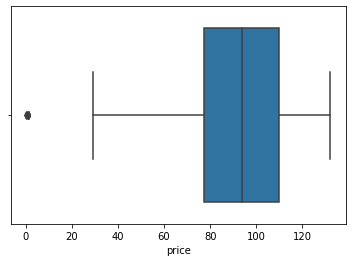

In [12]:
import seaborn as sns
sns.boxplot(df.price)

By synchronizing sampling with the arrival of informed traders , we may be able to make decisionsbefore prices reach a new equilibrium level.